In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from zipfile import ZipFile
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from keras.preprocessing import timeseries_dataset_from_array as ts_split
from keras import layers as kl
from keras.metrics import R2Score as r2
import shap

In [2]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506241445.pkl', 'rb'))
df

AAL_%Chg  ALGT_%Chg  ALK_%Chg  DAL_%Chg  ITA_%Chg  \
2018-01-02 09:30:00      0.13       0.52      1.31      0.31      0.08   
2018-01-02 09:45:00      0.19      -0.88      0.05     -0.13     -0.12   
2018-01-02 10:00:00     -0.08       1.09      0.18      0.22      0.17   
2018-01-02 10:15:00      0.02      -0.03      0.20      0.03     -0.16   
2018-01-02 10:30:00      0.04      -0.74      0.05      0.30     -0.18   
...                       ...        ...       ...       ...       ...   
2025-05-30 14:45:00      0.22       0.13      0.09      0.02      0.10   
2025-05-30 15:00:00      0.09      -0.03     -0.09      0.21      0.11   
2025-05-30 15:15:00      0.26       0.21      0.24      0.35      0.22   
2025-05-30 15:30:00     -0.13      -0.11     -0.31     -0.24     -0.11   
2025-05-30 15:45:00     -0.35      -0.73     -0.66     -0.32      0.01   

                     IYT_%Chg  JBLU_%Chg  JETS_%Chg  LUV_%Chg  UAL_%Chg  ...  \
2018-01-02 09:30:00      0.80       0.13       0.68      0.49      0.43  ...   
2018-01-02 09:45:00      0.07      -0.25      -0.04      0.43     -0.25  ...   
2018-01-02 10:00:00      0.23       0.27       0.32     -0.18      0.13  ...   
2018-01-02 10:15:00     -0.29      -0.38      -0.01     -0.27      0.28  ...   
2018-01-02 10:30:00     -0.09      -0.04      -0.08      0.30      0.24  ...   
...                       ...        ...        ...       ...       ...  ...   
2025-05-30 14:45:00      0.12       0.39       0.09      0.12      0.29  ...   
2025-05-30 15:00:00      0.02      -0.39       0.07      0.21      0.05  ...   
2025-05-30 15:15:00      0.18       0.29       0.22      0.21      0.49  ...   
2025-05-30 15:30:00     -0.14      -0.49      -0.09     -0.15     -0.19  ...   
2025-05-30 15:45:00      0.00      -0.98       0.00     -0.40     -0.39  ...   

                     month_of_year_12  hour_of_day_9  hour_of_day_10  \
2018-01-02 09:30:00             False           True           False   
2018-01-02 09:45:00             False           True           False   
2018-01-02 10:00:00             False          False            True   
2018-01-02 10:15:00             False          False            True   
2018-01-02 10:30:00             False          False            True   
...                               ...            ...             ...   
2025-05-30 14:45:00             False          False           False   
2025-05-30 15:00:00             False          False           False   
2025-05-30 15:15:00             False          False           False   
2025-05-30 15:30:00             False          False           False   
2025-05-30 15:45:00             False          False           False   

                     hour_of_day_11  hour_of_day_12  hour_of_day_13  \
2018-01-02 09:30:00           False           False           False   
2018-01-02 09:45:00           False           False           False   
2018-01-02 10:00:00           False           False           False   
2018-01-02 10:15:00           False           False           False   
2018-01-02 10:30:00           False           False           False   
...                             ...             ...             ...   
2025-05-30 14:45:00           False           False           False   
2025-05-30 15:00:00           False           False           False   
2025-05-30 15:15:00           False           False           False   
2025-05-30 15:30:00           False           False           False   
2025-05-30 15:45:00           False           False           False   

                     hour_of_day_14  hour_of_day_15  is_open  is_close  
2018-01-02 09:30:00           False           False        1         0  
2018-01-02 09:45:00           False           False        0         0  
2018-01-02 10:00:00           False           False        0         0  
2018-01-02 10:15:00           False           False        0         0  
2018-01-02 10:30:00           False           False        0         0  
...            

In [3]:
list(df.columns)[-100:]

['Word Count_UAL_48',
 'Word Count_UAL_8',
 'Word Count_UAL_96',
 'Word Count_general',
 'Word Count_general_16',
 'Word Count_general_4',
 'Word Count_general_48',
 'Word Count_general_8',
 'Word Count_general_96',
 'llm_sentiment_ALK',
 'llm_sentiment_ALK_16',
 'llm_sentiment_ALK_4',
 'llm_sentiment_ALK_48',
 'llm_sentiment_ALK_8',
 'llm_sentiment_ALK_96',
 'llm_sentiment_ALGT',
 'llm_sentiment_ALGT_16',
 'llm_sentiment_ALGT_4',
 'llm_sentiment_ALGT_48',
 'llm_sentiment_ALGT_8',
 'llm_sentiment_ALGT_96',
 'llm_sentiment_AAL',
 'llm_sentiment_AAL_16',
 'llm_sentiment_AAL_4',
 'llm_sentiment_AAL_48',
 'llm_sentiment_AAL_8',
 'llm_sentiment_AAL_96',
 'llm_sentiment_DAL',
 'llm_sentiment_DAL_16',
 'llm_sentiment_DAL_4',
 'llm_sentiment_DAL_48',
 'llm_sentiment_DAL_8',
 'llm_sentiment_DAL_96',
 'llm_sentiment_JBLU',
 'llm_sentiment_JBLU_16',
 'llm_sentiment_JBLU_4',
 'llm_sentiment_JBLU_48',
 'llm_sentiment_JBLU_8',
 'llm_sentiment_JBLU_96',
 'llm_sentiment_LUV',
 'llm_sentiment_LUV_16',


In [4]:
list(df.columns)

['AAL_%Chg',
 'ALGT_%Chg',
 'ALK_%Chg',
 'DAL_%Chg',
 'ITA_%Chg',
 'IYT_%Chg',
 'JBLU_%Chg',
 'JETS_%Chg',
 'LUV_%Chg',
 'UAL_%Chg',
 'AAL_%Chg_16',
 'ALGT_%Chg_16',
 'ALK_%Chg_16',
 'DAL_%Chg_16',
 'ITA_%Chg_16',
 'IYT_%Chg_16',
 'JBLU_%Chg_16',
 'JETS_%Chg_16',
 'LUV_%Chg_16',
 'UAL_%Chg_16',
 'AAL_%Chg_26',
 'ALGT_%Chg_26',
 'ALK_%Chg_26',
 'DAL_%Chg_26',
 'ITA_%Chg_26',
 'IYT_%Chg_26',
 'JBLU_%Chg_26',
 'JETS_%Chg_26',
 'LUV_%Chg_26',
 'UAL_%Chg_26',
 'AAL_%Chg_52',
 'ALGT_%Chg_52',
 'ALK_%Chg_52',
 'DAL_%Chg_52',
 'ITA_%Chg_52',
 'IYT_%Chg_52',
 'JBLU_%Chg_52',
 'JETS_%Chg_52',
 'LUV_%Chg_52',
 'UAL_%Chg_52',
 'AAL_%Chg_8',
 'ALGT_%Chg_8',
 'ALK_%Chg_8',
 'DAL_%Chg_8',
 'ITA_%Chg_8',
 'IYT_%Chg_8',
 'JBLU_%Chg_8',
 'JETS_%Chg_8',
 'LUV_%Chg_8',
 'UAL_%Chg_8',
 'AAL_Change',
 'ALGT_Change',
 'ALK_Change',
 'DAL_Change',
 'ITA_Change',
 'IYT_Change',
 'JBLU_Change',
 'JETS_Change',
 'LUV_Change',
 'UAL_Change',
 'AAL_Change_16',
 'ALGT_Change_16',
 'ALK_Change_16',
 'DAL_Change_16',

In [5]:
# Print all columns containing "AAL"
list([col for col in df.columns if 'JETS' in col])


['JETS_%Chg',
 'JETS_%Chg_16',
 'JETS_%Chg_26',
 'JETS_%Chg_52',
 'JETS_%Chg_8',
 'JETS_Change',
 'JETS_Change_16',
 'JETS_Change_26',
 'JETS_Change_52',
 'JETS_Change_8',
 'JETS_Change_High',
 'JETS_Change_Last',
 'JETS_Change_Low',
 'JETS_Change_Open',
 'JETS_Change_Volume',
 'JETS_Change_Volume_Day',
 'JETS_High',
 'JETS_High-Low',
 'JETS_High-Low%',
 'JETS_High-Low%_16',
 'JETS_High-Low%_26',
 'JETS_High-Low%_52',
 'JETS_High-Low%_8',
 'JETS_High-Low_16',
 'JETS_High-Low_26',
 'JETS_High-Low_52',
 'JETS_High-Low_8',
 'JETS_High_16',
 'JETS_High_26',
 'JETS_High_52',
 'JETS_High_8',
 'JETS_Last',
 'JETS_Last-Open',
 'JETS_Last-Open%',
 'JETS_Last-Open%_16',
 'JETS_Last-Open%_26',
 'JETS_Last-Open%_52',
 'JETS_Last-Open%_8',
 'JETS_Last-Open_16',
 'JETS_Last-Open_26',
 'JETS_Last-Open_52',
 'JETS_Last-Open_8',
 'JETS_Last_16',
 'JETS_Last_26',
 'JETS_Last_52',
 'JETS_Last_8',
 'JETS_Low',
 'JETS_Low_16',
 'JETS_Low_26',
 'JETS_Low_52',
 'JETS_Low_8',
 'JETS_Open',
 'JETS_Open_16',
 '

In [6]:
list([col for col in df.columns if '_Change_Volume' in col])

['AAL_Change_Volume',
 'ALGT_Change_Volume',
 'ALK_Change_Volume',
 'DAL_Change_Volume',
 'ITA_Change_Volume',
 'IYT_Change_Volume',
 'JBLU_Change_Volume',
 'JETS_Change_Volume',
 'LUV_Change_Volume',
 'UAL_Change_Volume',
 'AAL_Change_Volume_Day',
 'ALGT_Change_Volume_Day',
 'ALK_Change_Volume_Day',
 'DAL_Change_Volume_Day',
 'ITA_Change_Volume_Day',
 'IYT_Change_Volume_Day',
 'JBLU_Change_Volume_Day',
 'JETS_Change_Volume_Day',
 'LUV_Change_Volume_Day',
 'UAL_Change_Volume_Day']

In [7]:
# Data preprocessing
y_cols = ['AAL_Change_Volume']
x_cols = ['AAL_Change_Volume','ALGT_Change_Volume','ALK_Change_Volume','DAL_Change_Volume','ITA_Change_Volume','IYT_Change_Volume','JBLU_Change_Volume','JETS_Change_Volume','LUV_Change_Volume','UAL_Change_Volume','AAL_Change_Volume_Day','ALGT_Change_Volume_Day','ALK_Change_Volume_Day','DAL_Change_Volume_Day','ITA_Change_Volume_Day','IYT_Change_Volume_Day','JBLU_Change_Volume_Day','JETS_Change_Volume_Day','LUV_Change_Volume_Day','UAL_Change_Volume_Day',
        #'day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','month_of_year_1','month_of_year_2','month_of_year_3','month_of_year_4','month_of_year_5','month_of_year_6','month_of_year_7','month_of_year_8','month_of_year_9','month_of_year_10','month_of_year_11','month_of_year_12','hour_of_day_9','hour_of_day_10','hour_of_day_11','hour_of_day_12','hour_of_day_13','hour_of_day_14','hour_of_day_15',
        #'is_open','is_close',
        'AAL_%Chg','AAL_%Chg_16','AAL_%Chg_26','AAL_%Chg_52','AAL_%Chg_8','AAL_Change','AAL_Change_16','AAL_Change_26','AAL_Change_52','AAL_Change_8','AAL_Change_High','AAL_Change_Last','AAL_Change_Low','AAL_Change_Open','AAL_Change_Volume','AAL_Change_Volume_Day','AAL_High','AAL_High-Low','AAL_High-Low%','AAL_High-Low%_16','AAL_High-Low%_26','AAL_High-Low%_52','AAL_High-Low%_8','AAL_High-Low_16','AAL_High-Low_26','AAL_High-Low_52','AAL_High-Low_8','AAL_High_16','AAL_High_26','AAL_High_52','AAL_High_8','AAL_Last','AAL_Last-Open','AAL_Last-Open%','AAL_Last-Open%_16','AAL_Last-Open%_26','AAL_Last-Open%_52','AAL_Last-Open%_8','AAL_Last-Open_16','AAL_Last-Open_26','AAL_Last-Open_52','AAL_Last-Open_8','AAL_Last_16','AAL_Last_26','AAL_Last_52','AAL_Last_8','AAL_Low','AAL_Low_16','AAL_Low_26','AAL_Low_52','AAL_Low_8','AAL_Open','AAL_Open_16','AAL_Open_26','AAL_Open_52','AAL_Open_8','AAL_Roll_SDSD_Last_10','AAL_Roll_SDSD_Volume_10','AAL_Roll_SD_Last_10','AAL_Roll_SD_Volume_10','AAL_Volume','AAL_Volume_16','AAL_Volume_26','AAL_Volume_52','AAL_Volume_8',
        'Article Count_AAL','Article Count_AAL_16','Article Count_AAL_4','Article Count_AAL_48','Article Count_AAL_8','Article Count_AAL_96','Change_Article Count_AAL','Change_Article Count_AAL_16','Change_Article Count_AAL_4','Change_Article Count_AAL_48','Change_Article Count_AAL_8','Change_Article Count_AAL_96','Change_Negative Score_AAL','Change_Negative Score_AAL_16','Change_Negative Score_AAL_4','Change_Negative Score_AAL_48','Change_Negative Score_AAL_8','Change_Negative Score_AAL_96','Change_PCA_GKG1_0_AAL','Change_PCA_GKG1_0_AAL_16','Change_PCA_GKG1_0_AAL_4','Change_PCA_GKG1_0_AAL_48','Change_PCA_GKG1_0_AAL_8','Change_PCA_GKG1_0_AAL_96','Change_PCA_GKG1_1_AAL','Change_PCA_GKG1_1_AAL_16','Change_PCA_GKG1_1_AAL_4','Change_PCA_GKG1_1_AAL_48','Change_PCA_GKG1_1_AAL_8','Change_PCA_GKG1_1_AAL_96','Change_PCA_GKG1_2_AAL','Change_PCA_GKG1_2_AAL_16','Change_PCA_GKG1_2_AAL_4','Change_PCA_GKG1_2_AAL_48','Change_PCA_GKG1_2_AAL_8','Change_PCA_GKG1_2_AAL_96','Change_PCA_GKG1_3_AAL','Change_PCA_GKG1_3_AAL_16','Change_PCA_GKG1_3_AAL_4','Change_PCA_GKG1_3_AAL_48','Change_PCA_GKG1_3_AAL_8','Change_PCA_GKG1_3_AAL_96','Change_PCA_GKG1_4_AAL','Change_PCA_GKG1_4_AAL_16','Change_PCA_GKG1_4_AAL_4','Change_PCA_GKG1_4_AAL_48','Change_PCA_GKG1_4_AAL_8','Change_PCA_GKG1_4_AAL_96','Change_PCA_Scored_0_AAL','Change_PCA_Scored_0_AAL_16','Change_PCA_Scored_0_AAL_4','Change_PCA_Scored_0_AAL_48','Change_PCA_Scored_0_AAL_8','Change_PCA_Scored_0_AAL_96','Change_PCA_Scored_1_AAL','Change_PCA_Scored_1_AAL_16','Change_PCA_Scored_1_AAL_4','Change_PCA_Scored_1_AAL_48','Change_PCA_Scored_1_AAL_8','Change_PCA_Scored_1_AAL_96','Change_PCA_Scored_2_AAL','Change_PCA_Scored_2_AAL_16','Change_PCA_Scored_2_AAL_4','Change_PCA_Scored_2_AAL_48','Change_PCA_Scored_2_AAL_8','Change_PCA_Scored_2_AAL_96','Change_PCA_Scored_3_AAL','Change_PCA_Scored_3_AAL_16','Change_PCA_Scored_3_AAL_4','Change_PCA_Scored_3_AAL_48','Change_PCA_Scored_3_AAL_8','Change_PCA_Scored_3_AAL_96','Change_PCA_Scored_4_AAL','Change_PCA_Scored_4_AAL_16','Change_PCA_Scored_4_AAL_4','Change_PCA_Scored_4_AAL_48','Change_PCA_Scored_4_AAL_8','Change_PCA_Scored_4_AAL_96','Change_PCA_Word_0_AAL','Change_PCA_Word_0_AAL_16','Change_PCA_Word_0_AAL_4','Change_PCA_Word_0_AAL_48','Change_PCA_Word_0_AAL_8','Change_PCA_Word_0_AAL_96','Change_PCA_Word_1_AAL','Change_PCA_Word_1_AAL_16','Change_PCA_Word_1_AAL_4','Change_PCA_Word_1_AAL_48','Change_PCA_Word_1_AAL_8','Change_PCA_Word_1_AAL_96','Change_PCA_Word_2_AAL','Change_PCA_Word_2_AAL_16','Change_PCA_Word_2_AAL_4','Change_PCA_Word_2_AAL_48','Change_PCA_Word_2_AAL_8','Change_PCA_Word_2_AAL_96','Change_PCA_Word_3_AAL','Change_PCA_Word_3_AAL_16','Change_PCA_Word_3_AAL_4','Change_PCA_Word_3_AAL_48','Change_PCA_Word_3_AAL_8','Change_PCA_Word_3_AAL_96','Change_PCA_Word_4_AAL','Change_PCA_Word_4_AAL_16','Change_PCA_Word_4_AAL_4','Change_PCA_Word_4_AAL_48','Change_PCA_Word_4_AAL_8','Change_PCA_Word_4_AAL_96','Change_Polarity_AAL','Change_Polarity_AAL_16','Change_Polarity_AAL_4','Change_Polarity_AAL_48','Change_Polarity_AAL_8','Change_Polarity_AAL_96','Change_Tone_AAL','Change_Tone_AAL_16','Change_Tone_AAL_4','Change_Tone_AAL_48','Change_Tone_AAL_8','Change_Tone_AAL_96','Change_Word Count_AAL','Change_Word Count_AAL_16','Change_Word Count_AAL_4','Change_Word Count_AAL_48','Change_Word Count_AAL_8','Change_Word Count_AAL_96','Change_llm_sentiment_AAL','Change_llm_sentiment_AAL_16','Change_llm_sentiment_AAL_4','Change_llm_sentiment_AAL_48','Change_llm_sentiment_AAL_8','Change_llm_sentiment_AAL_96',
        'JETS_%Chg','JETS_%Chg_16','JETS_%Chg_26','JETS_%Chg_52','JETS_%Chg_8','JETS_Change','JETS_Change_16','JETS_Change_26','JETS_Change_52','JETS_Change_8','JETS_Change_High','JETS_Change_Last','JETS_Change_Low','JETS_Change_Open','JETS_Change_Volume','JETS_Change_Volume_Day','JETS_High','JETS_High-Low','JETS_High-Low%','JETS_High-Low%_16','JETS_High-Low%_26','JETS_High-Low%_52','JETS_High-Low%_8','JETS_High-Low_16','JETS_High-Low_26','JETS_High-Low_52','JETS_High-Low_8','JETS_High_16','JETS_High_26','JETS_High_52','JETS_High_8','JETS_Last','JETS_Last-Open','JETS_Last-Open%','JETS_Last-Open%_16','JETS_Last-Open%_26','JETS_Last-Open%_52','JETS_Last-Open%_8','JETS_Last-Open_16','JETS_Last-Open_26','JETS_Last-Open_52','JETS_Last-Open_8','JETS_Last_16','JETS_Last_26','JETS_Last_52','JETS_Last_8','JETS_Low','JETS_Low_16','JETS_Low_26','JETS_Low_52','JETS_Low_8','JETS_Open','JETS_Open_16','JETS_Open_26','JETS_Open_52','JETS_Open_8','JETS_Roll_SDSD_Last_10','JETS_Roll_SDSD_Volume_10','JETS_Roll_SD_Last_10','JETS_Roll_SD_Volume_10','JETS_Volume','JETS_Volume_16','JETS_Volume_26','JETS_Volume_52','JETS_Volume_8'
        ]

y = df[y_cols]
x = df[x_cols]

In [8]:
x

AAL_Change_Volume  ALGT_Change_Volume  ALK_Change_Volume  \
2018-01-02 09:30:00          -241224.0             -9689.0           -54076.0   
2018-01-02 09:45:00            -6325.0             -2289.0            30487.0   
2018-01-02 10:00:00           -73391.0              6077.0           -45066.0   
2018-01-02 10:15:00            -5089.0              -177.0            15546.0   
2018-01-02 10:30:00            15693.0               572.0            -4456.0   
...                                ...                 ...                ...   
2025-05-30 14:45:00           371509.0              1371.0            -3286.0   
2025-05-30 15:00:00           421117.0             -1357.0            15348.0   
2025-05-30 15:15:00          -429762.0              6408.0            27219.0   
2025-05-30 15:30:00           311240.0               151.0            61527.0   
2025-05-30 15:45:00          6146216.0             99199.0           308639.0   

                     DAL_Change_Volume  ITA_Change_Volume  IYT_Change_Volume  \
2018-01-02 09:30:00          -221911.0            12282.0           -35272.0   
2018-01-02 09:45:00           -80886.0           -18612.0            -6472.0   
2018-01-02 10:00:00           -43645.0             3274.0             6944.0   
2018-01-02 10:15:00           -97026.0            -5444.0            -6184.0   
2018-01-02 10:30:00            93652.0             4258.0             9640.0   
...                                ...                ...                ...   
2025-05-30 14:45:00          -160325.0             4323.0               38.0   
2025-05-30 15:00:00           -55196.0             -308.0             2631.0   
2025-05-30 15:15:00           188263.0             3703.0              -72.0   
2025-05-30 15:30:00          -147221.0            27941.0             9046.0   
2025-05-30 15:45:00           998165.0            33725.0             9903.0   

                     JBLU_Change_Volume  JETS_Change_Volume  \
2018-01-02 09:30:00           -387808.0             -2127.0   
2018-01-02 09:45:00           -172270.0             -1146.0   
2018-01-02 10:00:00            -17856.0               198.0   
2018-01-02 10:15:00            -43662.0              -200.0   
2018-01-02 10:30:00             -2976.0               505.0   
...                                 ...                 ...   
2025-05-30 14:45:00            288907.0             -4073.0   
2025-05-30 15:00:00            -27868.0             11054.0   
2025-05-30 15:15:00            370394.0             33771.0   
2025-05-30 15:30:00           -148018.0             15681.0   
2025-05-30 15:45:00           7415193.0           3395778.0   

                     LUV_Change_Volume  UAL_Change_Volume  ...  JETS_Open_8  \
2018-01-02 09:30:00          -113458.0          -413486.0  ...    32.666000   
2018-01-02 09:45:00           -16385.0            14124.0  ...    32.679125   
2018-01-02 10:00:00           -72984.0           -67153.0  ...    32.696125   
2018-01-02 10:15:00           -48041.0            38646.0  ...    32.726750   
2018-01-02 10:30:00            39612.0           -38284.0  ...    32.751000   
...                                ...                ...  ...          ...   
2025-05-30 14:45:00             2978.0            25287.0  ...    22.595625   
2025-05-30 15:00:00            56880.0            25166.0  ...    22.624375   
2025-05-30 15:15:00            53137.0           232865.0  ...    22.638750   
2025-05-30 15:30:00           198257.0          -170342.0  ...    22.656250   
2025-05-30 15:45:00          1546688.0          1752073.0  ...    22.673750   

                     JETS_Roll_SDSD_Last_10  JETS_Roll_SDSD_Volume_10  \
2018-01-02 09:30:00                0.019603               4735.475594   
2018-01-02 09:45:00                0.015215               3553.695622   
2018-01-02 10:00:00                0.009267                 42.188379   
2018-01-02 10:15:00                0.012353               3379.612186   
2018-01-02 10:30

In [9]:
# Train/text splitting
split_val  = round(0.7 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [10]:
# Normalize the features to [0,1]
sc2 = MinMaxScaler(feature_range=(0, 1))

x_train = sc2.fit_transform(x_train)
x_val   = sc2.transform(x_val)
x_test  = sc2.transform(x_test)

In [11]:
def create_tensor(data, type:str, steps_historical=26, steps_future=6, skiprows=1):
    # Need to fix skiprows to make the output data shorter

    tot_length = len(data) - steps_historical - steps_future + 1

    if type.lower() == 'x':
        x_tensor = np.zeros(shape=(tot_length, steps_historical, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            x_tensor[i] = data[i:j]
        return x_tensor
    
    elif type.lower() == 'y':
        y_tensor = np.zeros(shape=(tot_length, steps_future, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            k = j + steps_future
            y_tensor[i] = data[j:k]
        return y_tensor
    
    else:
        raise ValueError("Type must be 'x' or 'y'.")

In [12]:
steps_historical = 1
steps_future = 1

x_tensor_train = create_tensor(x_train, type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_test  = create_tensor(x_test , type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_val   = create_tensor(x_val  , type='x', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_train = create_tensor(y_train, type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_test  = create_tensor(y_test , type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_val   = create_tensor(y_val  , type='y', steps_historical=steps_historical, steps_future=steps_future)

In [13]:
for i in ['x_tensor_train', 'x_tensor_test', 'x_tensor_val', 'y_tensor_train', 'y_tensor_test', 'y_tensor_val']:
    print(f"{i} shape: {eval(i).shape}")

x_tensor_train shape: (33795, 1, 282)
x_tensor_test shape: (4827, 1, 282)
x_tensor_val shape: (9655, 1, 282)
y_tensor_train shape: (33795, 1, 1)
y_tensor_test shape: (4827, 1, 1)
y_tensor_val shape: (9655, 1, 1)


In [15]:
r2()(y_tensor_train, y_tensor_train)

ValueError: R2Score expects 2D inputs with shape (batch_size, output_dim). Received input shapes: y_pred.shape=(33795, 1, 1) and y_true.shape=(33795, 1, 1).

In [160]:
# Calculate the loss on a Naive model: predict 0 change as the next value
naive_mae_train = np.nanmean(np.abs(0 - y_tensor_train[:, -1, 0]))
naive_mae_val = np.mean(np.abs(0 - y_tensor_val[:, -1, 0]))

print(f"Naive model MAE on training data: {naive_mae_train:.6f}")
print(f"Naive model MAE on validation data: {naive_mae_val:.6f}")

Naive model MAE on training data: 416028.474301
Naive model MAE on validation data: 499511.946970


In [161]:
# Custom loss function to report MAE divided by naive_mae_val
def custom_loss(y_true, y_pred):
    mae = keras.losses.mean_absolute_error(y_true, y_pred)
    return mae / naive_mae_val

In [162]:
# Designing the model structure
kern = steps_historical-steps_future+1

model = keras.Sequential([
    kl.Input(shape=(steps_historical, len(x_cols))),
#    kl.Conv1D(len(x_cols), kernel_size=1),
#    kl.SimpleRNN(round(len(x_cols)), return_sequences=True, dropout=0.2),
    kl.LSTM(round(len(x_cols)/2), return_sequences=True, dropout=0.5),
#    kl.SimpleRNN(round(len(x_cols)/2), return_sequences=True, dropout=0.2),
#    kl.SimpleRNN(round(len(x_cols)/4), return_sequences=True, dropout=0),
#    kl.Conv1D(25, kernel_size=kern),
#    kl.LSTM(10, return_sequences=True),
    kl.LSTM(1)
])

learn = keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=100, decay_rate=0.96, staircase=True)

opt = keras.optimizers.RMSprop(learning_rate=learn)

model.compile(
    optimizer = opt,
    #loss = custom_loss
    loss = 'mae'
    )
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 1, 154)         │       285,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 1)              │           624 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,832 (1.09 MB)

 Trainable params: 285,832 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
# This will monitor validation loss and stop training if it doesn't improve after 5 epochs
#es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

history = model.fit(
    x_tensor_train, 
    y_tensor_train,
    validation_data = (x_tensor_val, y_tensor_val),
    steps_per_epoch= None,
    epochs = 10, 
    verbose = 1,
    batch_size = 1024,
    #callbacks = [es_callback],
    shuffle=False)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 264368.1250 - val_loss: 499511.9688
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9688
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9688
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062
Epoch 9/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062
Epoch 10/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 264368.1250 - val_loss: 499511.9062


In [164]:
x_tensor_flat = x_tensor_val.reshape(x_tensor_val.shape[0],x_tensor_val.shape[2])
def f(X):
    X2=X.reshape(X.shape[0],1,X.shape[1])
    return model.predict(X2).flatten()

# Randomly sample n rows of x_tensor_flat
np.random.seed(42)
sample_indices = np.random.choice(x_tensor_flat.shape[0], size=20, replace=False)
x_tensor_flat_sample = x_tensor_flat[sample_indices]


In [165]:
kernel_explainer = shap.KernelExplainer(f, x_tensor_flat_sample)
shap_values = kernel_explainer(x_tensor_flat_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step


  5%|▌         | 1/20 [00:02<00:38,  2.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step


 10%|█         | 2/20 [00:03<00:35,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step


 15%|█▌        | 3/20 [00:05<00:33,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step


 20%|██        | 4/20 [00:07<00:31,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step


 25%|██▌       | 5/20 [00:09<00:29,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step


 30%|███       | 6/20 [00:11<00:27,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step


 35%|███▌      | 7/20 [00:13<00:25,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step


 40%|████      | 8/20 [00:15<00:23,  1.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step


 45%|████▌     | 9/20 [00:17<00:21,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step


 50%|█████     | 10/20 [00:19<00:19,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step


 55%|█████▌    | 11/20 [00:21<00:17,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step


 60%|██████    | 12/20 [00:23<00:16,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step


 65%|██████▌   | 13/20 [00:25<00:13,  2.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step


 70%|███████   | 14/20 [00:27<00:12,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step


 75%|███████▌  | 15/20 [00:29<00:09,  1.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step


 80%|████████  | 16/20 [00:31<00:08,  2.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step


 85%|████████▌ | 17/20 [00:33<00:06,  2.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step


 90%|█████████ | 18/20 [00:35<00:03,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step


 95%|█████████▌| 19/20 [00:37<00:01,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step


100%|██████████| 20/20 [00:39<00:00,  1.96s/it]


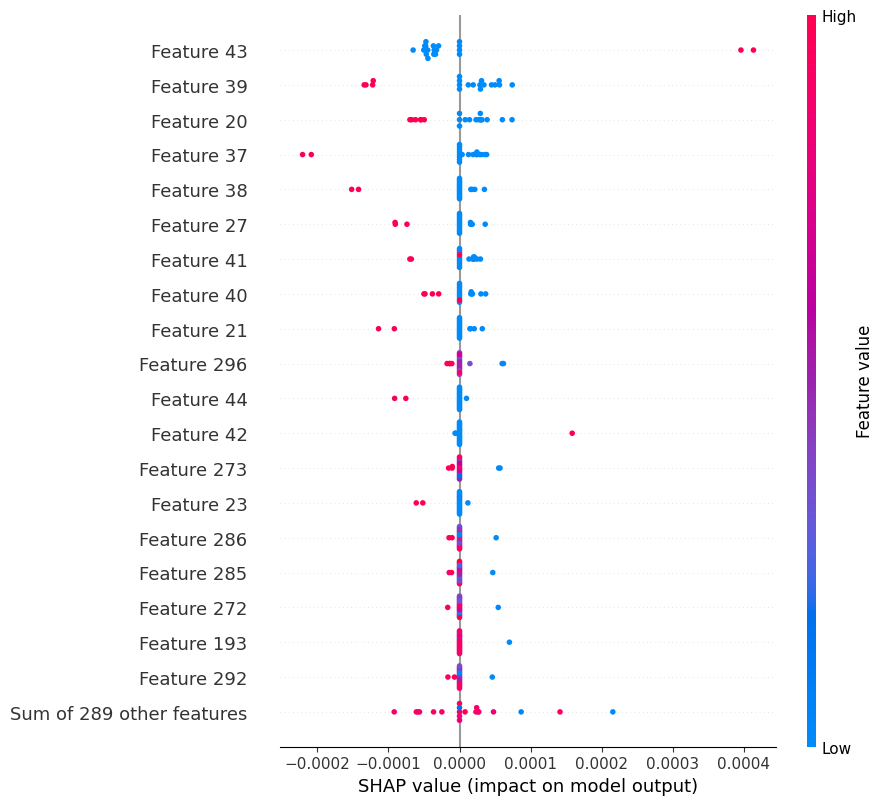

In [166]:
shap.plots.beeswarm(shap_values, max_display=20)

In [148]:
for f in [39,40,38,37,44,41,43,30,28,105,42,269,24,20,68,102,103,301,26]:
    print(f"Feature {f}: {x_cols[f]}")

Feature 39: hour_of_day_11
Feature 40: hour_of_day_12
Feature 38: hour_of_day_10
Feature 37: hour_of_day_9
Feature 44: is_open
Feature 41: hour_of_day_13
Feature 43: hour_of_day_15
Feature 30: month_of_year_6
Feature 28: month_of_year_4
Feature 105: AAL_Roll_SD_Volume_10
Feature 42: hour_of_day_14
Feature 269: JETS_High-Low_8
Feature 24: day_of_week_4
Feature 20: day_of_week_0
Feature 68: AAL_High-Low%_8
Feature 102: AAL_Roll_SDSD_Last_10
Feature 103: AAL_Roll_SDSD_Volume_10
Feature 301: JETS_Roll_SD_Last_10
Feature 26: month_of_year_2


In [24]:
# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

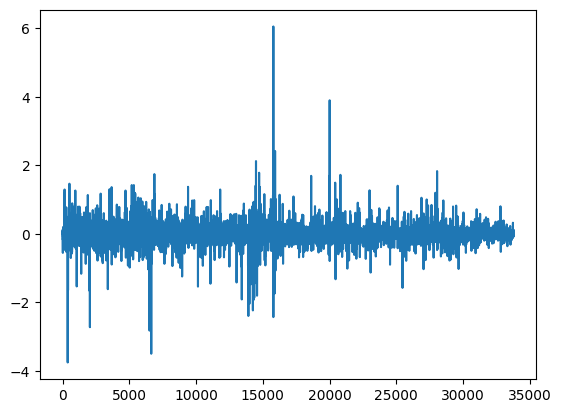

In [422]:
# Transform y_tensor_val from shape (9633, 12, 1) to (9633, 12)
y_tensor_train = y_tensor_train.reshape(y_tensor_train.shape[0], y_tensor_train.shape[1])
plt.plot(pd.DataFrame(y_tensor_train).iloc[:,0].to_frame())